In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from scipy import interpolate
import pickle
from matplotlib.colors import LogNorm

import Functions

In [4]:
Path0 = '/global/homes/l/lianming/Presto-Color-2/data/'
Path1 = '/global/homes/l/lianming/Presto-Color-2/data/Test_Interp'
Path2 = '/global/homes/l/lianming/Presto-Color-2/data/2Day_Interp'

In [5]:
Path0 = '/global/homes/l/lianming/Presto-Color-2/data'
Path1 = '/global/homes/l/lianming/Presto-Color-2/data/Test_Interp'
Path2 = '/global/homes/l/lianming/Presto-Color-2/data/2Day_Interp'

PathInterp = Path2

####### Parameter setting

EventNames = np.load(os.path.join(PathInterp, 'EventName.npy'))

In [6]:
EventNames

array(['AGN', 'CART', 'EB', 'ILOT', 'KN_B19', 'KN_K17', 'MIRA', 'Mdwarf',
       'PISN', 'RRL', 'SLSN-I', 'SNII-NMF', 'SNII-Templates', 'SNIIn',
       'SNIa-91bg', 'SNIa-SALT2', 'SNIax', 'SNIbc-MOSFIT',
       'SNIbc-Templates', 'TDE', 'V19_CC+HostXT', 'uLens-Binary',
       'uLens-Single-GenLens', 'uLens-Single_PyLIMA'], dtype='<U20')

In [7]:
len(EventNames)

24

In [8]:
PathInterp = Path2

EventNames = np.load(os.path.join(PathInterp, 'EventName.npy'))
RateDict = {key:1 for key in EventNames}

In [9]:
RateDict

{'AGN': 1,
 'CART': 1,
 'EB': 1,
 'ILOT': 1,
 'KN_B19': 1,
 'KN_K17': 1,
 'MIRA': 1,
 'Mdwarf': 1,
 'PISN': 1,
 'RRL': 1,
 'SLSN-I': 1,
 'SNII-NMF': 1,
 'SNII-Templates': 1,
 'SNIIn': 1,
 'SNIa-91bg': 1,
 'SNIa-SALT2': 1,
 'SNIax': 1,
 'SNIbc-MOSFIT': 1,
 'SNIbc-Templates': 1,
 'TDE': 1,
 'V19_CC+HostXT': 1,
 'uLens-Binary': 1,
 'uLens-Single-GenLens': 1,
 'uLens-Single_PyLIMA': 1}

In [9]:
#Coordinates

CoordinateDict = {}

# CoordinateDict['Bands'] = ['u', 'g', 'r', 'i', 'z', 'Y']
CoordinateDict['Bands'] = ['g', 'i']
CoordinateDict['dT1s'] = np.arange(60, 65, 30)
CoordinateDict['dT2s'] =  np.arange(450, 460, 60)

CoordinateDict['BinMag'] = np.arange(-1.25, 3.84, 0.1)
CoordinateDict['BinColor'] = np.arange(-9.25, 9.8, 0.5)

In [10]:
HashTable = np.zeros([len(CoordinateDict['Bands']), len(CoordinateDict['Bands']), len(CoordinateDict['dT1s']), len(CoordinateDict['dT2s']), 
                      len(CoordinateDict['BinMag'])-1, len(CoordinateDict['BinColor'])-1], dtype='int32')

In [13]:
CoordinateDict

{'Bands': ['g', 'i'],
 'dT1s': array([60]),
 'dT2s': array([450]),
 'BinMag': array([-1.25, -1.15, -1.05, -0.95, -0.85, -0.75, -0.65, -0.55, -0.45,
        -0.35, -0.25, -0.15, -0.05,  0.05,  0.15,  0.25,  0.35,  0.45,
         0.55,  0.65,  0.75,  0.85,  0.95,  1.05,  1.15,  1.25,  1.35,
         1.45,  1.55,  1.65,  1.75,  1.85,  1.95,  2.05,  2.15,  2.25,
         2.35,  2.45,  2.55,  2.65,  2.75,  2.85,  2.95,  3.05,  3.15,
         3.25,  3.35,  3.45,  3.55,  3.65,  3.75]),
 'BinColor': array([-9.25, -8.75, -8.25, -7.75, -7.25, -6.75, -6.25, -5.75, -5.25,
        -4.75, -4.25, -3.75, -3.25, -2.75, -2.25, -1.75, -1.25, -0.75,
        -0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,  3.75,
         4.25,  4.75,  5.25,  5.75,  6.25,  6.75,  7.25,  7.75,  8.25,
         8.75,  9.25,  9.75])}

In [12]:
HashTable.shape

(2, 2, 1, 1, 50, 38)

In [11]:
EventNames = [ 'SNII-NMF',
              'SNIa-SALT2', 
              'uLens-Binary']

In [14]:
EventNames = [ 'SNIa-SALT2']

In [15]:
time1 = time.time()

dMagRange = [[], []]
ColorRange = [[], []]

for EventName in EventNames:
    
    FilePath = os.path.join(PathInterp, EventName+'_Interp.pkl')
    with open(FilePath, 'rb') as f:
        Interp_load = pickle.load(f)
        TimeRange_load = pickle.load(f)  

    for ii, Band1 in enumerate(CoordinateDict['Bands']):
        for jj, Band2 in enumerate(CoordinateDict['Bands']):
            if jj==ii:
                continue
            else:
                for kk, dT1 in enumerate(CoordinateDict['dT1s']):
                    for ll, dT2 in enumerate(CoordinateDict['dT2s']):

                        data = Functions.CalculateMap(Interp_load, TimeRange_load, 
                                     Band1, Band2, dT1, dT2, PointsPDay=12);

                        histdata,_,_ = np.histogram2d(data[0], data[1], bins=[CoordinateDict['BinMag'], CoordinateDict['BinColor']])

                        dMagRange[0].append(data[0].min())
                        dMagRange[1].append(data[0].max())
                        ColorRange[0].append(data[1].min())
                        ColorRange[1].append(data[1].max())
                        
                        outliersNo = len(data[0]) - np.sum(histdata)
                        if outliersNo != 0:
                            print('{:.0f} outliers found!'.format(outliersNo), end='')

#                         HashTable[ii, jj, kk, ll] = histdata*RateDict[EventName] + HashTable[ii, jj, kk, ll]
                        HashTable[ii, jj, kk, ll] = histdata + HashTable[ii, jj, kk, ll]


                        print('|', end='')
                    
        print('')
            
print('Finish!')

print( 'The range of dMag is [{}, {}].'.format( min(dMagRange[0]), max(dMagRange[1])) ) 
print( 'The range of Color is [{}, {}].'.format( min(ColorRange[0]), max(ColorRange[1])) )

print( '{} min spent.'.format( (time.time() - time1)/60 ))

|
|
Finish!
The range of dMag is [-0.05113273859024048, 2.057286500930786].
The range of Color is [-5.542726860688493, 5.629779853974355].
10.151674171288809 min spent.


In [170]:
with open('ProbabilityCube_SNIa_1Slice0.1.pkl', 'wb') as f:
    pickle.dump(EventNames, f)
    pickle.dump(CoordinateDict, f)
    pickle.dump(HashTable, f ) 

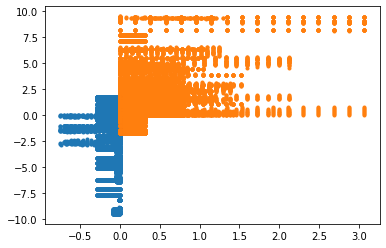

In [74]:
plt.plot(dMagRange[0], ColorRange[0], '.', dMagRange[1], ColorRange[1], '.')

In [66]:
print( 'The range of dMag is [{}, {}].'.format( min(dMagRange[0]), max(dMagRange[1])) ) 
print( 'The range of Color is [{}, {}].'.format( min(ColorRange[0]), max(ColorRange[1])) )

The range of dMag is [-0.14117995898093127, 0.3533891836843317].
The range of Color is [-8.942305388341218, 8.931305717655285].


In [64]:
min(dMagRange[0])

-0.14117995898093127

# Test running times

In [18]:
FilePath = '/global/homes/l/lianming/Presto-Color-2/data/2Day_Interp/EB_Interp.pkl'

In [11]:
FilePath = '/global/homes/l/lianming/Presto-Color-2/data/2Day_Interp/uLens-Binary_Interp.pkl'

In [19]:
with open(FilePath, 'rb') as f:
        Interp_load = pickle.load(f)
        TimeRange_load = pickle.load(f)  

In [20]:
len(Interp_load['u'])

40000

In [15]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=0.1);

10.2 s ± 202 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%time
data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=0.1);

CPU times: user 10.9 s, sys: 140 ms, total: 11 s
Wall time: 11 s


In [7]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=1);

21.8 s ± 325 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=1, ObjNo=10000);

5.66 s ± 202 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=1, ObjNo=20000);

10.7 s ± 217 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=3);

41.3 s ± 347 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=6);

1min 8s ± 423 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=12);

2min 3s ± 554 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
tempx = np.array([0.1, 1, 3, 6, 12])
tempy = np.array([11.4, 35.1, 62, 106, 165])

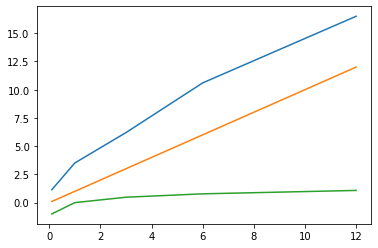

In [16]:
plt.plot(tempx, tempy/10)
plt.plot(tempx, tempx)
plt.plot(tempx, np.log10(tempx))

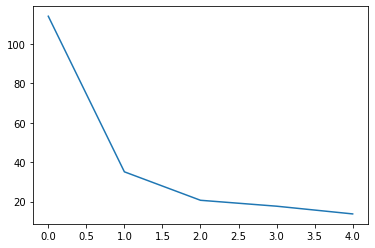

In [15]:
plt.plot(tempy/np.sqrt(tempx))

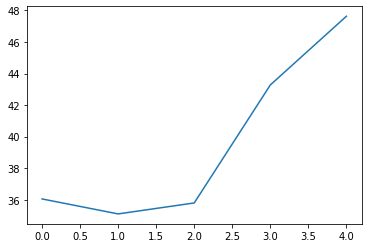

In [19]:
plt.plot(tempy/np.sqrt(tempx))

In [26]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=1);

35.3 s ± 893 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=3);

1min 11s ± 6.14 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=6);

1min 57s ± 11.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
%timeit data = Functions.CalculateMap1(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=1);

48.4 s ± 686 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
%timeit data = Functions.CalculateMap1(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=12);

6min 56s ± 14.3 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Plot results

In [14]:
with open('/global/homes/l/lianming/data/Test_Interp/KN_B19_Interp.pkl', 'rb') as f:
    Interp = pickle.load(f)
    Time = pickle.load(f)

In [38]:
min(dMagRange[0])

-1.313423008342653

In [134]:
with open('/global/homes/l/lianming/ProbabilityCube_Sep20_15:15_SNIa-SALT2', 'rb') as f:
    EventNames = pickle.load(f)
    InfoDict = pickle.load(f)
    HashTable = pickle.load(f)

In [135]:
InfoDict

{'EventNames': ['SNIa-SALT2'],
 'Bands': ['g', 'i'],
 'dT1s': array([120]),
 'dT2s': array([0]),
 'BinMag': array([-1.25, -1.15, -1.05, -0.95, -0.85, -0.75, -0.65, -0.55, -0.45,
        -0.35, -0.25, -0.15, -0.05,  0.05,  0.15,  0.25,  0.35,  0.45,
         0.55,  0.65,  0.75,  0.85,  0.95,  1.05,  1.15,  1.25,  1.35,
         1.45,  1.55,  1.65,  1.75,  1.85,  1.95,  2.05,  2.15,  2.25,
         2.35,  2.45,  2.55,  2.65,  2.75,  2.85,  2.95,  3.05,  3.15,
         3.25,  3.35,  3.45,  3.55,  3.65,  3.75]),
 'BinColor': array([-9.25, -8.75, -8.25, -7.75, -7.25, -6.75, -6.25, -5.75, -5.25,
        -4.75, -4.25, -3.75, -3.25, -2.75, -2.25, -1.75, -1.25, -0.75,
        -0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,  3.75,
         4.25,  4.75,  5.25,  5.75,  6.25,  6.75,  7.25,  7.75,  8.25,
         8.75,  9.25,  9.75])}

In [16]:
HashTable.shape

(2, 2, 1, 1, 50, 38)

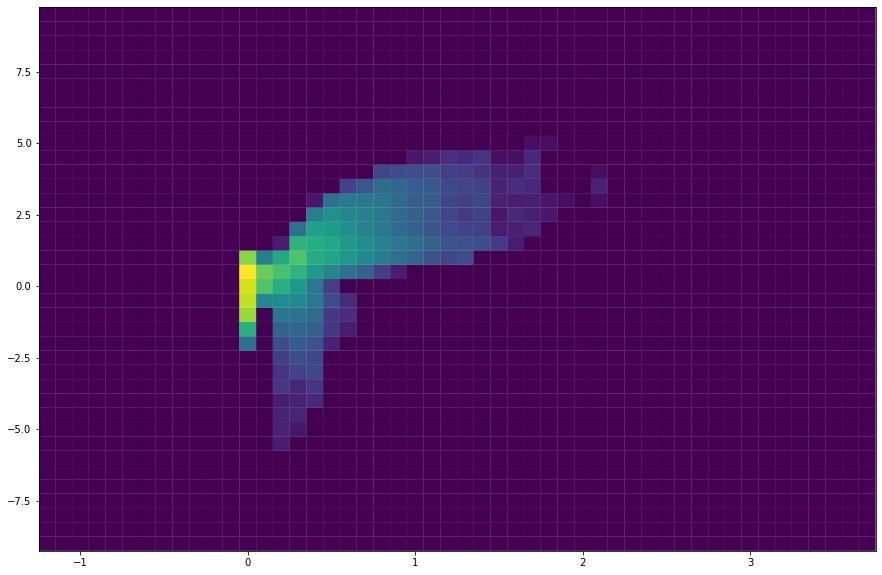

In [29]:
#If dMag and Color are not given, a 2-D array will be returned.
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

Map = HashTable[1, 0 , 0,0]
plt.pcolor(CoordinateDict['BinMag'], CoordinateDict['BinColor'], np.transpose(Map)+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map.max()+1))
# plt.xlim([-0.5, 2.5])
# plt.ylim([-7.5, 4])
# plt.axis('equal')

# plt.legend()

In [123]:
Map

In [ ]:
Map = Enquiry(HashTable, InfoDict, 'g', 'i', 60, 450)

In [18]:
def Enquiry(HashTable, InfoDict, Band1, Band2, dT1, dT2, dMag=None, Color=None):

    Ind1 = InfoDict['Bands'].index(Band1)
    Ind2 = InfoDict['Bands'].index(Band2)

    if dT1<InfoDict['dT1s'][0] or dT1>InfoDict['dT1s'][-1]:
        raise ValueError('The value of dT1 is out of boundary, the available interval is [{:.2f}, {:.2f}].'.format(InfoDict['dT1s'][0], InfoDict['dT1s'][-1]))
        
    else:
        Ind3 = np.where( dT1 >= InfoDict['dT1s'] )[0][-1]

    if dT2<InfoDict['dT2s'][0] or dT2>InfoDict['dT2s'][-1]:
        raise ValueError('The value of dT2 is out of boundary, the available interval is [{:.2f}, {:.2f}].'.format(InfoDict['dT2s'][0], InfoDict['dT2s'][-1]))
    else:
        Ind4 = np.where( dT2 >= InfoDict['dT2s'] )[0][-1]

    Results = HashTable[Ind1, Ind2, Ind3, Ind4]

    if dMag == None:
        pass        
    elif dMag<InfoDict['BinMag'][0] or dMag>=InfoDict['BinMag'][-1]:
        raise ValueError('The value of dMag is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinMag'][0], InfoDict['BinMag'][-1]))
        
    else:
        Results = Results[np.where( dMag >= InfoDict['BinMag'] )[0][-1]]       

    if Color == None:
        pass        
    elif Color<InfoDict['BinColor'][0] or Color>=InfoDict['BinColor'][-1]:
        raise ValueError('The value of Color is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinColor'][0], InfoDict['BinColor'][-1]))
        
    else:
        Results = Results[..., np.where( Color >= InfoDict['BinColor'] )[0][-1] ]

    return Results

In [18]:
from matplotlib.colors import LogNorm

TypeError: Dimensions of C (50, 38) are incompatible with X (51) and/or Y (39); see help(pcolor)

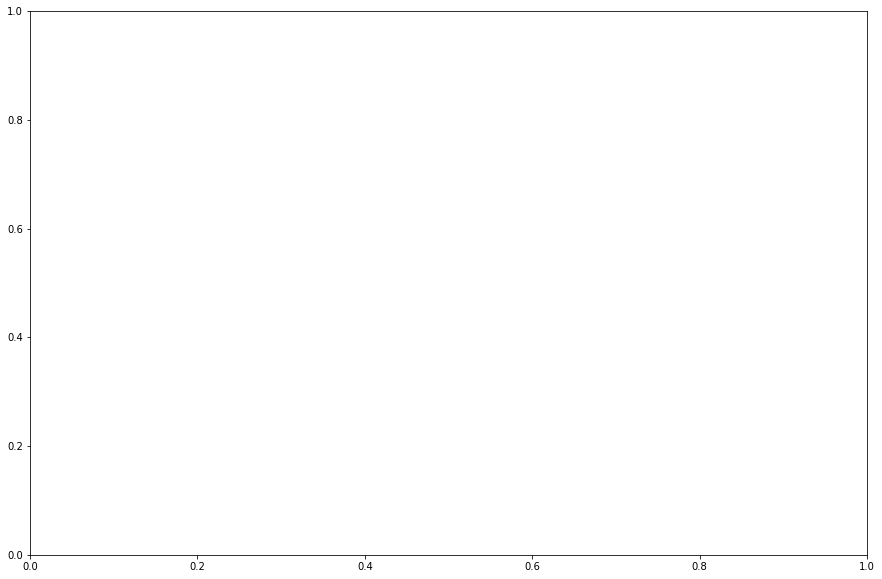

In [22]:
#If dMag and Color are not given, a 2-D array will be returned.
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Map = Enquiry(HashTable, InfoDict, 'g', 'g', 60, 450)
Map = HashTable[0, 1, 0, 0]

plt.pcolor(CoordinateDict['BinMag'], CoordinateDict['BinColor'], Map+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray', alpha=0.5)
# plt.xlim([-0.5, 2.5])
# plt.ylim([-7.5, 4])
# plt.axis('equal')

ax.scatter(dataKN[0], dataKN[1], c='salmon', s=10, alpha=0.5, label='Kilonova')

plt.legend()